# HOUSE PRICE ESTIMETER

# load the data

In [1]:
import pandas as pd

# Load the housing dataset
file_path = "/mnt/data/Housing.csv"
df = pd.read_csv(r"C:\Users\SS\Downloads\Housing.csv")

# Display basic information about the dataset
df_info = df.info()
df_shape = df.shape
df_head = df.head()
df_description = df.describe()
df_missing = df.isnull().sum()

(df_shape, df_head, df_description, df_missing)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


((545, 13),
       price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
 0  13300000  7420         4          2        3      yes        no       no   
 1  12250000  8960         4          4        4      yes        no       no   
 2  12250000  9960         3          2        2      yes        no      yes   
 3  12215000  7500         4          2        2      yes        no      yes   
 4  11410000  7420         4          1        2      yes       yes      yes   
 
   hotwaterheating airconditioning  parking prefarea furnishingstatus  
 0              no             yes        2      yes        furnished  
 1              no             yes        3       no        furnished  
 2              no              no        2      yes   semi-furnished  
 3              no             yes        3      yes        furnished  
 4              no             yes        2       no        furnished  ,
               price          area    bedrooms   bathrooms     stories  \

# Data Preprocessing

In [2]:
from sklearn.preprocessing import LabelEncoder

# Create a copy of the dataframe for preprocessing
df_encoded = df.copy()

# Identify categorical columns
categorical_cols = df_encoded.select_dtypes(include=['object']).columns

# Apply Label Encoding to all categorical columns
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le  # Store the encoder for possible inverse transformation

# Display the encoded dataframe's first few rows
df_encoded.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0


#  Feature Engineering and Train/Test Split

In [3]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df_encoded.drop("price", axis=1)
y = df_encoded["price"]

# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Output the shapes of the split datasets
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((436, 12), (109, 12), (436,), (109,))

# Model Selection and Training

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Initialize and train a Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predict on test data
y_pred = lr_model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

(mae, rmse, r2)


(979679.6912959905, np.float64(1331071.4167895105), 0.6494754192267804)

# Visualizing Results


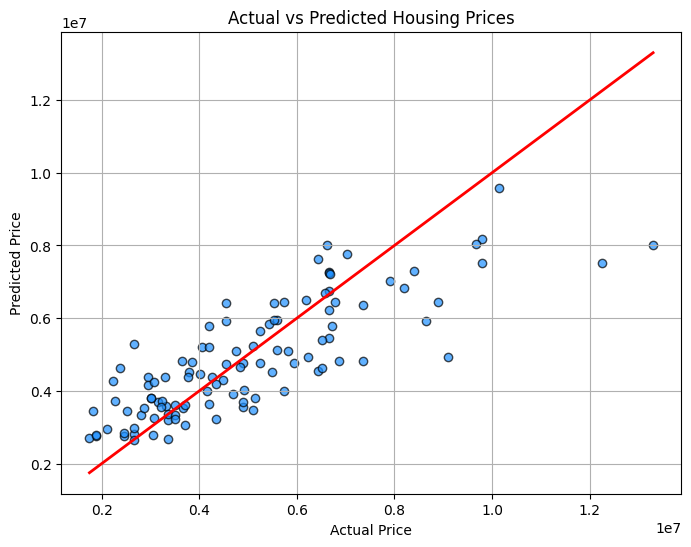

In [5]:
import matplotlib.pyplot as plt

# Predict using the test data
y_pred = lr_model.predict(X_test)

# Plot Actual vs Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='dodgerblue', edgecolor='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Housing Prices')
plt.grid(True)
plt.show()


# SAVE THE MODEL


In [6]:
import joblib

# Save the trained model
joblib.dump(lr_model, "linear_regression_model.joblib")

# Optionally, save the label encoders if needed for decoding later
joblib.dump(label_encoders, "label_encoders.joblib")


['label_encoders.joblib']